In [1]:
import matplotlib.pyplot as plt
import scipy.optimize, scipy.special
import csv
import numpy as np
import copy
from scipy.special import expit

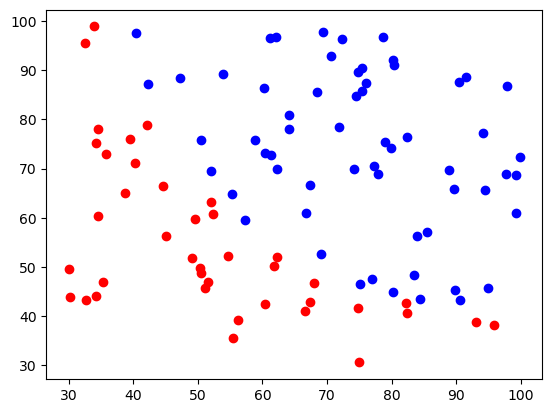

In [2]:
#X = []
y = []
X1=[]
f = open('ex2data1.txt', 'r', encoding='utf-8')
data_reader = csv.reader(f)
for line in data_reader:
    #print(line)
    X1.append([float(line[0]), float(line[1])])
    y.append(float(line[2]))

f.close()

m = len(X1)
X=np.array(X1)

fg1 = plt.figure()
for i in range(m):
    if y[i] == 1.0:
        plt.plot(X[i][0], X[i][1], 'bo')
    else:
        plt.plot(X[i][0], X[i][1], 'ro')

#H=theta[2]*x1 + theta[1]*x2 +theta[0]
ones = np.reshape(np.ones(m), (m, 1)) 
X = np.reshape(X, (m, 2))
X = np.concatenate((ones, X), axis=1) #[1, x1 ,x2] shape=(100,3)
y = np.array(y)
theta = np.zeros([3, 1])

In [3]:
def sigmoid(x):
    a = np.exp(-x)
    return 1.0 / (1.0 + a)

In [4]:
Js = []
epsilon = 0.0000001 # zero division defender

########## Gradient Descent ##########################

def computeCost(theta, X, y):
    m = len(X)
    H = sigmoid(X.dot(theta))
    J = ((np.log(H + epsilon).T.dot(-y) - np.log(1.0 - H + epsilon).T.dot(1-y)) / m).flatten()
    print(J)
    Js.append(J[0])
    return J

In [5]:
iterations = 400

def findMinTheta(theta, X, y):
    result = scipy.optimize.fmin(computeCost, x0=theta, args=(X, y), maxiter=iterations, full_output=True)
    return result[0], result[1]

[0.69314698]
[0.69312199]
[0.69018127]
[0.6903682]
[0.68931536]
[0.68744734]
[0.68564825]
[0.68209698]
[0.68280297]
[0.67834541]
[0.6729512]
[0.67155928]
[0.66462395]
[0.66413987]
[0.65648268]
[0.65049993]
[0.6405817]
[0.63909197]
[0.63256564]
[0.63217106]
[0.63870517]
[0.6365237]
[0.64478848]
[0.63350876]
[0.64649186]
[0.6324008]
[0.63304791]
[0.63217469]
[0.63461661]
[0.63196236]
[0.63257742]
[0.63207753]
[0.63228869]
[0.63202489]
[0.63187016]
[0.63193625]
[0.63180848]
[0.63187296]
[0.63170225]
[0.63172258]
[0.63161325]
[0.63164399]
[0.63180886]
[0.63168961]
[0.63142763]
[0.63125719]
[0.63138265]
[0.63151567]
[0.63106659]
[0.63083513]
[0.6310257]
[0.63065963]
[0.6304322]
[0.63018059]
[0.62979105]
[0.62974111]
[0.62951362]
[0.62939448]
[0.62977114]
[0.62927715]
[0.62995951]
[0.62945661]
[0.6296159]
[0.62927973]
[0.62959765]
[0.62925844]
[0.6299096]
[0.62922096]
[0.62927221]
[0.62925583]
[0.62924853]
[0.62943703]
[0.62921212]
[0.62928038]
[0.62922342]
[0.62922157]
[0.62920604]
[0.62922

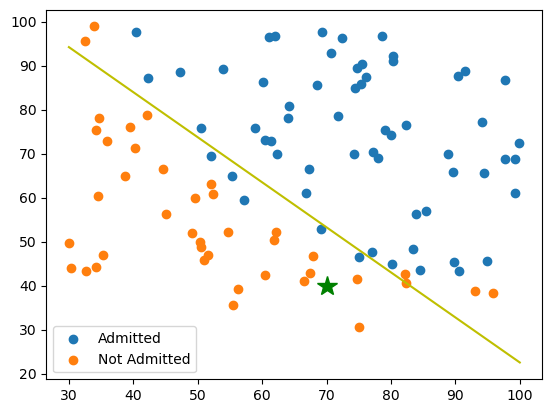

In [6]:
theta_result, cost = findMinTheta(theta, X, y)
print(theta_result)


plot_x = np.array([30, 100])
plot_y = -1/theta_result[2] * (theta_result[1] * plot_x + theta_result[0])

#theta_result[2] * plot_y + theta_result[1] * plot_x + theta_result[0]= 0

plt.plot(plot_x, plot_y, 'y-')

pos1 = [i for i in range(len(y)) if y[i]==1]
pos0 = [i for i in range(len(y)) if y[i]==0]

X1=np.array(X1)
a,b=np.split(X1, 2, axis=1)
a=a.flatten()
b=b.flatten()

plt.scatter(a[pos1], b[pos1], label='Admitted')
plt.scatter(a[pos0], b[pos0], label='Not Admitted')
######### Evaluation #############

def eval(x, theta):
    x = np.array(x)
    H = sigmoid(x.dot(theta))

    if H > 0.5:
        print("admitted")
    else:
        print("Not admitted")

    plt.plot(x[1], x[2], 'g*',markersize=15)

test_1 = [1, 70, 40]

eval(test_1, theta_result)
plt.legend()
plt.show()